<a href="https://colab.research.google.com/github/rusamentiaga/pytorch-test/blob/main/4_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models and transfer learning

The advantage of machine learning is that models do not need to be created  from scratch, you can start from predesigned models that can be used to a similar problem. In addition, it is possible to start from pre-trained models, where only specific layers are trained to adapt them to a specific problem.

# Dataset cifar-10

To demonstrate how transfer learning works, a dataset available in torchvision will be used: [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html).

Packages are loaded.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

The device is configured

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

A transformation is defined to adapt the dataset to the input size expected by the network. In addition, it is normalized.

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

The dataset is downloaded and the loaders are configured.

In [4]:
batch_size = 4

#Downloading training data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)

#Downloading test data
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

#Class labels

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
num_classes = len(classes)



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


It is verified that the files are on disk.

In [5]:
!ls data/cifar-10-batches-py

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


You can see the size of each batch.

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.shape


torch.Size([4, 3, 224, 224])

In [ ]:
print(f'Train images: {len(train_data)}')
print(f'Test images: {len(test_data)}')
print(f'Train batches: {int(len(train_data)/batch_size)}')

Train images: 50000
Test images: 10000
Train batches: 12500


A batch is displayed. The dataset contains low-resolution images of 10 classes.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, ' Ship   Cat  Ship Truck')

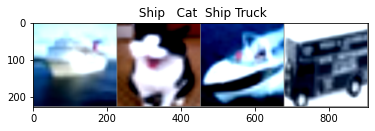

In [ ]:
import matplotlib.pyplot as plt

grid = torchvision.utils.make_grid(images)
grid.shape

# unnormalize
grid = grid / 2 + 0.5     
plt.imshow(grid.permute(1,2,0))

plt.title(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Starting from a pre-designed model

In order to classify the dataset, we will start with [AlexNet](https://github.com/pytorch/vision/blob/master/torchvision/models/alexnet.py). The model can be downloaded with the parameters trained with [ImageNet](https://www.google.com/search?q=Imagenet).


In [ ]:
alexnet = torch.hub.load('pytorch/vision', 'alexnet', pretrained=False)
alexnet.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_master


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

To adapt it to the specific problem, the last layer must be changed.

In [ ]:
#Updating the third and the last classifier that is the output layer of the network. Make sure to have 10 output nodes if we are going to get 10 class labels through our model.
alexnet.classifier[6] = torch.nn.Linear(4096,num_classes)
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

The training function is defined.

In [ ]:
import time

def train_model(model, criterion, optimizer):
  # Train the model

  training_start = time.time()

  model.train()
  total_step = len(trainloader)
  for epoch in range(num_epochs):
      start = time.time()
      for i, (images, labels) in enumerate(trainloader):
          images = images.to(device)
          labels = labels.to(device)
          
          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          if (i+1) % 100 == 0:
              end = time.time()
              print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss}, Time: {end - start}')
              start = time.time()

  training_end = time.time()
  print(f'Training time: {training_end - training_start}')


The evaluation function is defined.

In [ ]:
def eval_model(model):
  model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in testloader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      print('Test Accuracy of the model using the test images: {} %'.format(100 * correct / total)) 

The model is trained with a certain configuration.

In [ ]:
# Hyperparameters
num_epochs = 1
learning_rate = 0.001
momentum = 0.9

# Model
model = alexnet.to(device)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Train
train_model(model, criterion, optimizer)

# Eval
eval_model(model)

Epoch [1/1], Step [100/12500], Loss: 2.2805428504943848, Time: 1.1791431903839111
Epoch [1/1], Step [200/12500], Loss: 2.272365093231201, Time: 1.0493731498718262
Epoch [1/1], Step [300/12500], Loss: 2.2991724014282227, Time: 1.0501453876495361
Epoch [1/1], Step [400/12500], Loss: 2.308487892150879, Time: 1.0279579162597656
Epoch [1/1], Step [500/12500], Loss: 2.32207989692688, Time: 1.0348734855651855
Epoch [1/1], Step [600/12500], Loss: 2.3082218170166016, Time: 1.0280702114105225
Epoch [1/1], Step [700/12500], Loss: 2.3015477657318115, Time: 1.0353822708129883
Epoch [1/1], Step [800/12500], Loss: 2.2580275535583496, Time: 1.0340821743011475
Epoch [1/1], Step [900/12500], Loss: 2.139927387237549, Time: 1.0339584350585938
Epoch [1/1], Step [1000/12500], Loss: 2.3122196197509766, Time: 1.0231287479400635
Epoch [1/1], Step [1100/12500], Loss: 2.084153890609741, Time: 1.1194777488708496
Epoch [1/1], Step [1200/12500], Loss: 2.2698659896850586, Time: 1.029364824295044
Epoch [1/1], Step [1

You can now try the same process but downloading the pre-trained network.

# Blocking learning in some layers
During training you can block the training of certain layers to speed up the process.


In [7]:
alexnet_lock = torch.hub.load('pytorch/vision', 'alexnet', pretrained=True)
alexnet_lock.eval()

Downloading: "https://github.com/pytorch/vision/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

It is specified that no gradient is calculated for the model.

In [12]:
# Freeze model weights
for param in alexnet_lock.parameters():
    param.requires_grad = False

A new classification layer is added. When a new layer is added, by default it is established that the gradient will be calculated and, therefore, its training is allowed.

In [13]:
alexnet_lock.classifier[6] = torch.nn.Linear(4096, num_classes)
alexnet_lock.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

You can also change a set of layers and reduce for example the complexity from 4096 to 512 in the last layer.

In [10]:
alexnet_lock.classifier = torch.nn.Sequential(
  torch.nn.Dropout(),
  torch.nn.Linear(256 * 6 * 6, 4096),
  torch.nn.ReLU(inplace=True),
  torch.nn.Dropout(),
  torch.nn.Linear(4096, 512),
  torch.nn.ReLU(inplace=True),
  torch.nn.Linear(512, num_classes),
)
alexnet_lock.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Locked parameters can be observed.

In [14]:
total_params = sum(p.numel() for p in alexnet_lock.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in alexnet_lock.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

42,361,162 total parameters.
40,970 training parameters.


Parameters are configured and training is performed.

In [ ]:
# Hyperparameters
num_epochs = 2
learning_rate = 0.001
momentum = 0.9

# Model
model = alexnet_lock.to(device)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Train
train_model(model, criterion, optimizer)

# Eval
eval_model(model)

Epoch [1/2], Step [100/12500], Loss: 1.6063991785049438, Time: 0.9697377681732178
Epoch [1/2], Step [200/12500], Loss: 1.3835158348083496, Time: 0.7986788749694824
Epoch [1/2], Step [300/12500], Loss: 0.9807689189910889, Time: 0.8232200145721436
Epoch [1/2], Step [400/12500], Loss: 0.8265544772148132, Time: 0.8202576637268066
Epoch [1/2], Step [500/12500], Loss: 1.590893268585205, Time: 0.833930253982544
Epoch [1/2], Step [600/12500], Loss: 0.9324761033058167, Time: 0.8340668678283691
Epoch [1/2], Step [700/12500], Loss: 0.4583611488342285, Time: 0.800642728805542
Epoch [1/2], Step [800/12500], Loss: 1.620725393295288, Time: 0.8343210220336914
Epoch [1/2], Step [900/12500], Loss: 1.029371738433838, Time: 0.8448023796081543
Epoch [1/2], Step [1000/12500], Loss: 1.305085301399231, Time: 0.8326833248138428
Epoch [1/2], Step [1100/12500], Loss: 0.9985271692276001, Time: 0.8109915256500244
Epoch [1/2], Step [1200/12500], Loss: 0.9321693778038025, Time: 0.8180696964263916
Epoch [1/2], Step [


# Other models in torchvision

The cifar-10 dataset is very common for analyzing the performance of new models. You can check [the accuracy of the new models](https://benchmarks.ai/cifar-10).

More [models](https://pytorch.org/vision/stable/models.html) are available in PyTorch for testing purposes.



Models can be compared based on their complexity.

In [ ]:
import torchvision.models as models
resnet18 = models.resnet18()
alexnet = models.alexnet()
vgg16 = models.vgg16()
squeezenet = models.squeezenet1_0()
densenet = models.densenet161()
inception = models.inception_v3()
googlenet = models.googlenet()
shufflenet = models.shufflenet_v2_x1_0()
mobilenet_v2 = models.mobilenet_v2()
mobilenet_v3_large = models.mobilenet_v3_large()
mobilenet_v3_small = models.mobilenet_v3_small()
resnext50_32x4d = models.resnext50_32x4d()
wide_resnet50_2 = models.wide_resnet50_2()
mnasnet = models.mnasnet1_0()

/usr/local/lib/python3.7/dist-packages/torchvision/models/inception.py:82: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)
/usr/local/lib/python3.7/dist-packages/torchvision/models/googlenet.py:79: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)


In [ ]:
total_params = sum(p.numel() for p in vgg16.parameters())
print(f'Total params: {total_params:,}');

Total params: 138,357,544


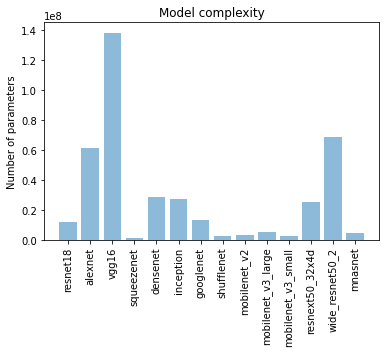

In [ ]:
m = []

m.append(resnet18)
m.append(alexnet)
m.append(vgg16)
m.append(squeezenet)
m.append(densenet)
m.append(inception)
m.append(googlenet)
m.append(shufflenet)
m.append(mobilenet_v2)
m.append(mobilenet_v3_large)
m.append(mobilenet_v3_small)
m.append(resnext50_32x4d)
m.append(wide_resnet50_2)
m.append(mnasnet)

params = []
for model in m:
  params.append(sum(p.numel() for p in model.parameters()))

tparams = torch.tensor(params)
objects = ('resnet18', 'alexnet', 'vgg16', 'squeezenet', 'densenet', 
           'inception', 'googlenet', 'shufflenet', 'mobilenet_v2', 'mobilenet_v3_large', 
           'mobilenet_v3_small', 'resnext50_32x4d', 'wide_resnet50_2', 'mnasnet')
pos = range(len(objects))

y=plt.bar(pos, params, align='center', alpha=0.5)
plt.xticks(pos, objects, rotation='vertical')
plt.ylabel('Number of parameters')
plt.title('Model complexity')

plt.show()
